<a href="https://colab.research.google.com/github/sasongko8888/wpu-resolusi/blob/main/Practice_2_News_Clustering_Unstructured_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pembahasan sedikit tentang Natural Language Processing (NLP)

Natural language processing (NLP) adalah is a adalah metode untuk menerjemahkan antara komputer (seringnya dikembangkan dengan AI) dan bahasa manusia. Sampai saat ini NLP masih dikembangkan, dan semakin canggih. [source](https://www.kdnuggets.com/2018/10/main-approaches-natural-language-processing-tasks.html)


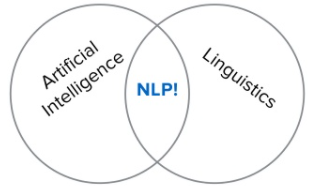


Berbagai macam pemanfaatan NLP:

1. Text Classification Tasks
 - **Goal**: memprediksi tag, memprediksi suatu kategori, sentimen
 - **Application**: filtering spam emails, mengklasifikasikan dokumen berdasarkan konten dominan, analisis sentimen
 
2. Word Sequence Tasks
 - **Goal**: pemodelan bahasa, memprediksi kata berikutnya / sebelumnya, pembuatan teks
 - **Application**: terjemahan, chatbots, penandaan urutan (prediksi tag POS untuk setiap kata secara berurutan), pengenalan entitas
 
3. Text Meaning Tasks
 - **Goal**: bagaimana kita merepresentasikan makna
 - **Application**: menemukan kata-kata yang mirip (vektor serupa), embeddings kalimat (sebagai lawan dari embeddings kata), pemodelan topik, pencarian, menjawab pertanyaan
 
4. Sequence to Sequence Tasks
 - Banyak tugas yang dapat dibingkai dengan:
terjemahan mesin, peringkasan, penyederhanaan, sistem tanya jawab
 - Sistem semacam itu menggunakan paradigma encoder dan decoder, yang bekerja sebagai pelengkap untuk menemukan representasi teks yang tersembunyi, dan menggunakan representasi tersembunyi tersebut.
 
5. Dialog Systems
Terdapat 2 kategori utama sistem dialog:
  - Sistem dialog yang berorientasi pada tujuan berfokus pada kegunaan dalam domain tertentu yang dibatasi; lebih presisi, kurang bisa digeneralisasikan.
  - Sistem dialog percakapan berkaitan dengan membantu atau menghibur dalam konteks yang jauh lebih umum; kurang presisi, lebih banyak generalisasi.
 
6. Clustering Text
 - Biasanya untuk mengelompokkan berita, segmentasi pasar berdasarkan data tweet.

## Langkah-langkah Data Cleaning yang umum dilakukan untuk NLP:

1. Mengubah teks menjadi huruf kecil
  - Jika data Anda tidak membedakan huruf besar / kecil, Anda harus mempertimbangkan kasus penggunaan Anda juga.
  - Beberapa pengecualian, jika ada akronim, yang mungkin kehilangan artinya jika diubah menjadi kata, mis. dalam bahasa jerman, MIT (universitas) vs mit (jerman untuk dengan).

2. Menghapus tanda baca dan karakter lainnya
  - Pengecualian data twitter, di mana tanda baca mungkin berguna untuk menunjukkan sentimen.

3. Menghapus nilai numerik
  - Umumnya nilai numerik tidak memiliki informasi sentimen, tergantung pada tujuan pembelajaran, semisal seperti data chatbot yang mengandung jumlah, maka nilai numerik akan berguna.

4. Tokenisasi teks
  - Berbagai cara untuk memberi token pada teks.

5. Menghapus stopwords
  - Stopwords dapat diubah menjadi spesifik kasus penggunaan,
misalnya menambahkan nama restoran ke daftar stopwords untuk review restoran, karena orang biasanya akan memberikan nama restoran dalam review tersebut misalnya twitter Anda mungkin ingin menambahkan kata-kata seperti 'RT' 'Retweet' dll untuk tweet.

6. Stemming / lemmatization
  - Variasi kata yang berbeda karena sufiks, tetapi arti kata tersebut sama, penggunaan kata tersebut identik, untuk mencegah duplikasi kata yang disimpan dan meningkatkan efisiensi.
  - Hasil lemmatization adalah kata yang tepat, tidak seperti stemming.

7. Parts of speech tagging
  - Berguna untuk mengidentifikasi, meringkas, untuk mendapatkan mis. pengambilan kata benda dari potongan teks panjang.

8. Membuat bi-gram atau tri-gram

9. Mengatasi kesalahan ketik (typo) dan kesalahan ejaan

- Natural Language Toolkit (nltk) : https://www.nltk.org/index.html


## Studi Kasus Sederhana Clustering untuk Mengelompokkan Berita menggunakan K-Means Clustering

Algoritma clustering berbasis vektor yang paling banyak digunakan adalah k-means. Apa yang dilakukan k-means adalah mengembalikan tugas cluster ke salah satu dari *k* cluster yang mungkin untuk setiap data. 


![image.gif](https://miro.medium.com/max/469/1*-Ox371N1-L4oyJBRhi1uZw.gif)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
!pip install Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.cluster import KMeans 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 3.9 MB/s eta 0:00:00


In [ ]:
documents =[  "pemuda Prancis dinobatkan sebagai juara dunia",
              "Aplikasi Google Terjemahan semakin cerdas setiap hari",
              "Pengenalan wajah Facebook membuatku gila",
              "siapa yang akan memenangkan gelar Golden Ball tahun ini",
              "aplikasi kamera ini lucu",
              "Tim Kroasia membuat kampanye piala dunia yang brilian mencapai pertandingan final",
              "Ekstensi Google Chrome berguna.",
              "Aplikasi Media Sosial memanfaatkan AI dengan luar biasa",
              "Piala dunia FIFA 2022 Qatar dimainkan di musim dingin",
              "Avatar adalah film fiksi ilmiah epik Amerika 2009 yang disutradarai oleh James Cameron",
              "The Last Avenger belum pernah dirumorkan atau menjadi film populer sebelumnya",
              "Pixar Animation Studios adalah studio film animasi komputer Amerika yang berbasis di Emeryvilles",
              "The John Wick adalah film brutal" 
]


In [ ]:
# 1. Mengubah text menjadi huruf kecil
doc_clean = []
for text in documents:
  doc_clean.append(text.lower()) # menggunakan method lower untuk mengubah semua huruf dalam string menjadi huruf kecil

documents = doc_clean
documents[:10]

['pemuda prancis dinobatkan sebagai juara dunia',
 'aplikasi google terjemahan semakin cerdas setiap hari',
 'pengenalan wajah facebook membuatku gila',
 'siapa yang akan memenangkan gelar golden ball tahun ini',
 'aplikasi kamera ini lucu',
 'tim kroasia membuat kampanye piala dunia yang brilian mencapai pertandingan final',
 'ekstensi google chrome berguna.',
 'aplikasi media sosial memanfaatkan ai dengan luar biasa',
 'piala dunia fifa 2022 qatar dimainkan di musim dingin',
 'avatar adalah film fiksi ilmiah epik amerika 2009 yang disutradarai oleh james cameron']

**RE**
- Regular expression (RE) adalah pola yang coba dicocokkan oleh mesin ekspresi reguler dalam teks masukan. Sebuah pola terdiri dari satu atau lebih literal karakter, operator, atau konstruksi. [source](https://docs.microsoft.com/en-us/dotnet/standard/base-types/regular-expression-language-quick-reference)

In [ ]:
import re

# 2. Menghapus tanda baca dan karakter lainnya
doc_clean = []
for text in documents:
  text = re.sub(r'[-()\"#/@;:<>{}`+=~|.!?,]', '',text) # menggunakan library re (regular expresion) untuk menghapus tanda baca dan karakter lainnya pada data
  doc_clean.append(text) 

documents = doc_clean
documents[:10]

['pemuda Prancis dinobatkan sebagai juara dunia',
 'Aplikasi Google Terjemahan semakin cerdas setiap hari',
 'Pengenalan wajah Facebook membuatku gila',
 'siapa yang akan memenangkan gelar Golden Ball tahun ini',
 'aplikasi kamera ini lucu',
 'Tim Kroasia membuat kampanye piala dunia yang brilian mencapai pertandingan final',
 'Ekstensi Google Chrome berguna',
 'Aplikasi Media Sosial memanfaatkan AI dengan luar biasa',
 'Piala dunia FIFA 2022 Qatar dimainkan di musim dingin',
 'Avatar adalah film fiksi ilmiah epik Amerika 2009 yang disutradarai oleh James Cameron']

In [ ]:
import re

# 3. Menghapus nilai numerik
doc_clean = []
for text in documents:
  text = re.sub(r'[0-9]', '',text) # menggunakan library re (regular expresion) untuk menghapus nilai numerik pada data
  doc_clean.append(text) 

documents = doc_clean
documents[:10]

In [ ]:
#  4. Tokenisasi Text
#  5. Menghapus Stopword
factory = StopWordRemoverFactory() # inisialisasi method stopwords bahasa indonesia
stopwords = factory.get_stop_words() # mendapatkan list stopwords bahasa indonesia
vectorizer = TfidfVectorizer(stop_words = stopwords) # inisialisasi tokenizer dengan menggunakan stopwords bahasa indonesia
data = vectorizer.fit_transform(documents) # menerapkan terhadap dokumen atau dataset

In [ ]:
# Nomor 6 - 9 tidak dilakukan (skip)

**Metode Elbow**
- Langkah mendasar untuk setiap algoritma unsupervised adalah menentukan jumlah cluster optimal tempat data dapat dikelompokkan. Metode Elbow adalah salah satu metode paling populer untuk menentukan nilai k yang optimal. Kami akan mendemonstrasikan metode yang diberikan menggunakan teknik pengelompokan K-Means menggunakan library Sklearn python.

In [ ]:
# Modeling menggunakan K-Means clustering dengan optimasi jumlah cluster menggunakan Elbow Methods
distortions = []
K = range(2,10)
for k in K:
    clustering_model = KMeans(n_clusters=k, max_iter = 300)
    clustering_model.fit(data)
    distortions.append(clustering_model.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


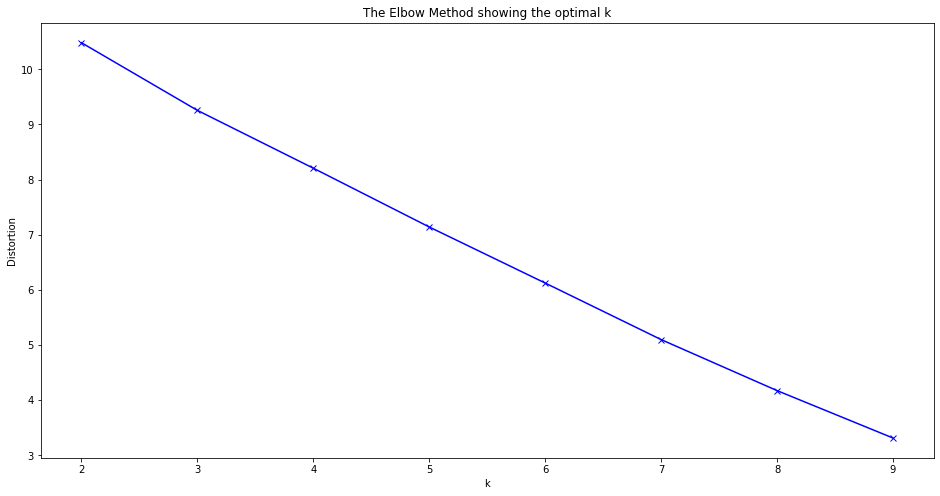

In [ ]:
# Plot Elbow Methods
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# Mendapatkan jumlah cluster paling optimal
optimal_k = 3
kmeanModel = KMeans(n_clusters=optimal_k)
kmeanModel.fit(data)

KMeans(n_clusters=3)

In [ ]:
## Term (word) per cluster
sorted_centroids = clustering_model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

## Print Term (word) per cluster
for i in range(optimal_k):
        print("Cluster %d:" % i, end='')
        for ind in sorted_centroids[i, :10]:
            print(' %s,' % terms[ind], end='')
        print()
        print()

print()

Cluster 0: piala, dunia, musim, fifa, dimainkan, qatar, dingin, mencapai, kampanye, tim,

Cluster 1: the, film, wick, brutal, john, dirumorkan, menjadi, sebelumnya, last, avenger,

Cluster 2: aplikasi, kamera, lucu, ai, biasa, memanfaatkan, sosial, media, luar, ekstensi,




In [ ]:
## predicting the cluster of new docs
new_doc = ["Transformer adalah film robot terbaik"] 
Y = vectorizer.transform(new_doc)
prediction = clustering_model.predict(Y)
print('Cluster', prediction[0], ':', new_doc[0])

new_doc = ["Pertandingan Final UCL dimainkan di Madrid tahun ini"] 
Y = vectorizer.transform(new_doc)
prediction = clustering_model.predict(Y)
print('Cluster', prediction[0], ':', new_doc[0])

Cluster 1 : Transformer adalah film robot terbaik
Cluster 0 : Pertandingan Final UCL dimainkan di Madrid tahun ini


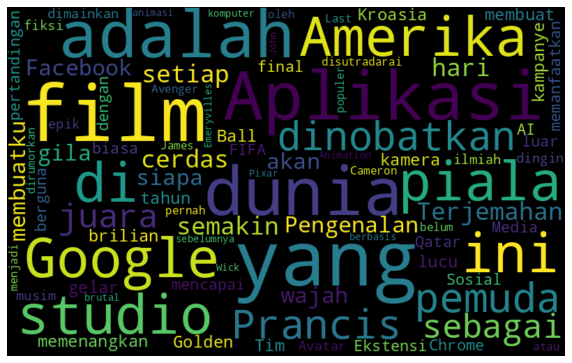

In [ ]:
from wordcloud import WordCloud
from collections import Counter

# Menggabungkan seluruh data ke dalam satu string dengan spasi
all_words = ' '.join(documents)

# Menggunakan library WordCloud untuk plotting jumlah masing-masing kata 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Reference:
- [NLP Cheatsheet: Master NLP](https://www.kaggle.com/dmitrykilievych/nlp-cheatsheet-master-nlp)
- [Types of text preprocessing techniques](https://www.kdnuggets.com/2019/04/text-preprocessing-nlp-machine-learning.html)
- [https://towardsdatascience.com/nlp-text-preprocessing-a-practical-guide-and-template-d80874676e79](https://towardsdatascience.com/nlp-text-preprocessing-a-practical-guide-and-template-d80874676e79)
- [Text clustering with K-means and tf-idf](https://medium.com/@MSalnikov/text-clustering-with-k-means-and-tf-idf-f099bcf95183)
- [A Friendly Introduction to Text Clustering](https://towardsdatascience.com/a-friendly-introduction-to-text-clustering-fa996bcefd04)
- [Text kmeans clustering with python](https://github.com/MNoorFawi/text-kmeans-clustering-with-python)